# Import libarires

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# 1 - Data cleaning

In [25]:
# Load the dataset
df = pd.read_csv('bone_slice_merged\\allworkers.csv')

# Preview the first few rows
print(df.head())
print(df.shape)

   Minute  Label  Knife_Sharpness_Category  Shift  Pelvis x_Vel  Pelvis y_Vel  \
0       0      4                         0      1           0.0           0.0   
1       1      4                         0      1           0.0           0.0   
2       2      4                         0      1           0.0           0.0   
3       3      0                         0      1           0.0           0.0   
4       4      0                         0      1           0.0           0.0   

   Pelvis z_Vel  L5 x_Vel  L5 y_Vel  L5 z_Vel  ...  Left Lower Leg y_Acc  \
0           0.0  0.027806 -0.051742  0.198527  ...             -0.070723   
1           0.0  0.043772 -0.035047  0.252839  ...              0.056990   
2           0.0 -0.019464  0.056012  0.228783  ...              0.253975   
3           0.0 -0.136964  0.101034  0.211410  ...             -0.406729   
4           0.0 -0.040060 -0.060612  0.178886  ...              0.059038   

   Left Lower Leg z_Acc  Left Foot x_Acc  Left Foot y_Ac

In [ ]:
print(df.columns)

## 1.1 - Check for missing values

In [26]:
missing_values = df.isnull().sum()

# print the columns whose missing values are greater than 0
print(missing_values[missing_values > 0])
# print(missing_values)
# print(df.shape)

Series([], dtype: int64)


-> There is no missing values in the dataset

## 1.2 - Check for duplicates

In [27]:
# Check for duplicates
duplicates = df.duplicated().sum()

print(duplicates)

0


-> There is no duplicates in the dataset

## 1.3 - Drop unecessary columns

In [33]:
# select columns with constant values
constant_columns = df.columns[df.nunique() <= 1]
print(constant_columns)

# Drop the constant columns
df.drop(constant_columns, axis=1, inplace=True)

# List the unnecessary columns
unnecessary_columns = ['Worker', 'Minute']

# Drop the minutes column if exists
if 'Minute' in df.columns:
    df.drop(['Minute'], axis=1, inplace=True)

# Drop the worker column if exists
if 'Worker' in df.columns:
    df.drop(['Worker'], axis=1, inplace=True)

print (df.shape) 

Index([], dtype='object')
(8840, 136)


## 1.4 - Fix data types

In [31]:
# 2. Fix data types
df['Label'] = df['Label'].astype('category')
df['Main_Activity'] = df['Main_Activity'].astype('category')
df['Knife_Sharpness_Category'] = df['Knife_Sharpness_Category'].astype('category')

## 1.3 - Handle outliers

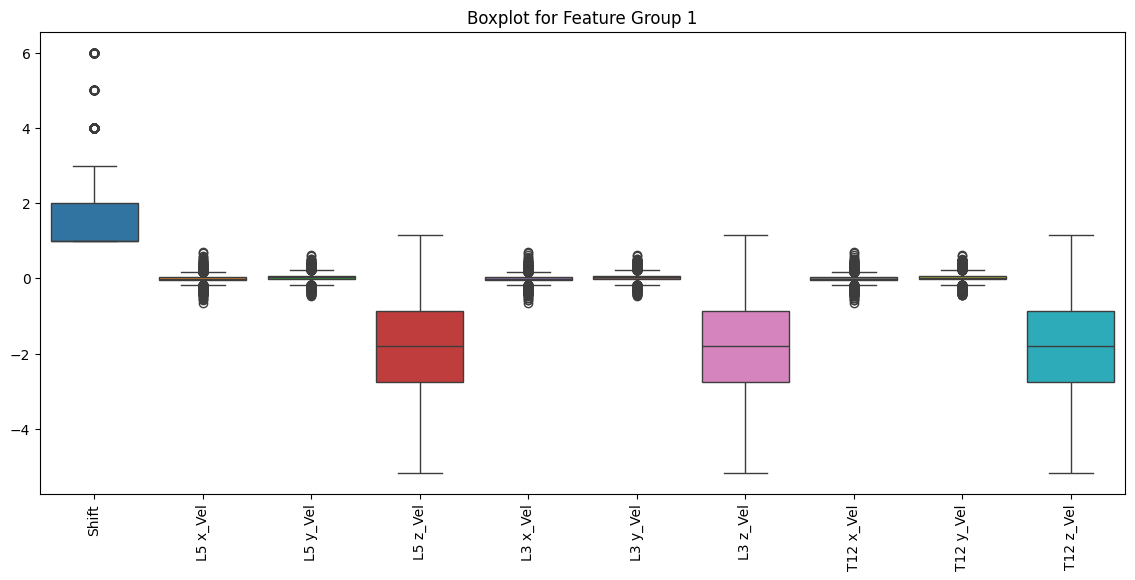

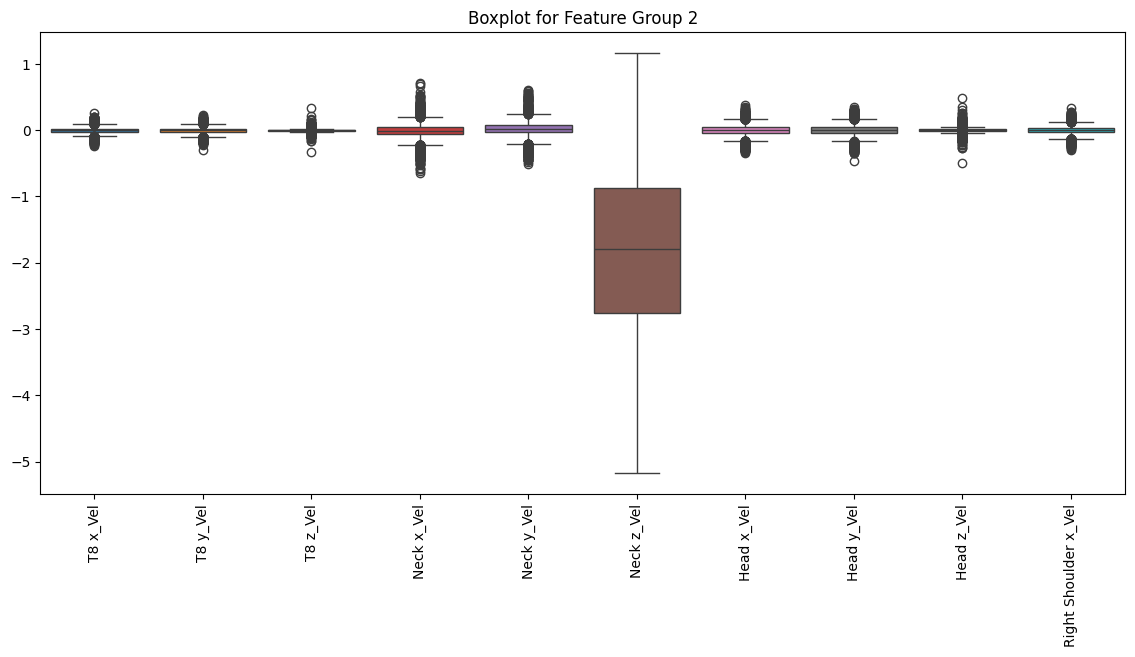

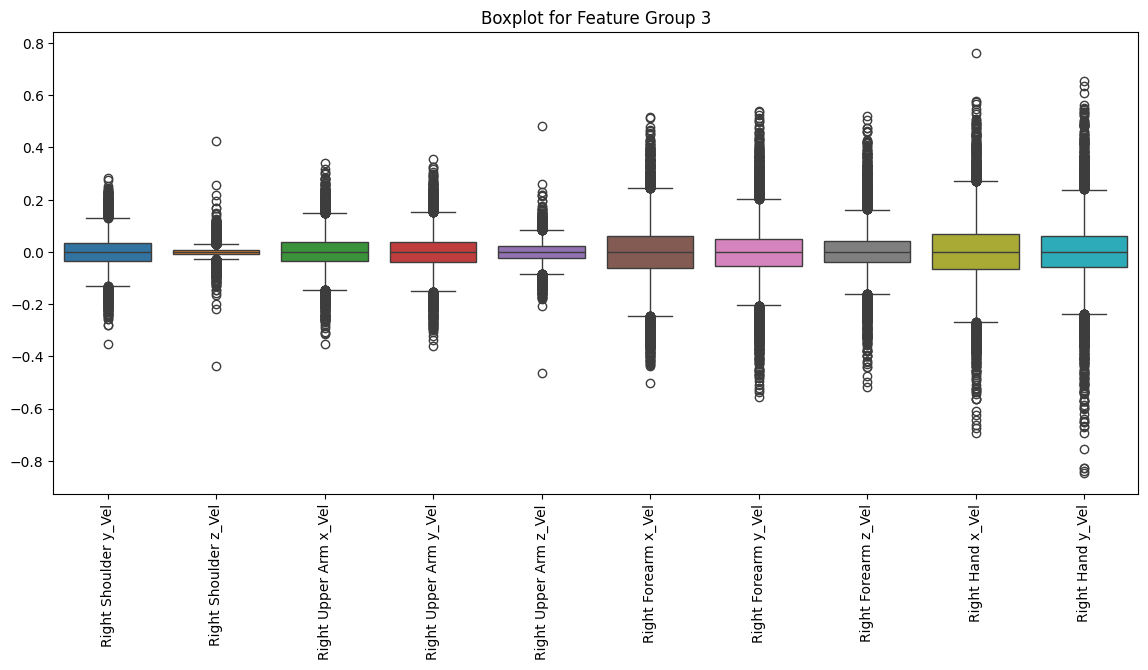

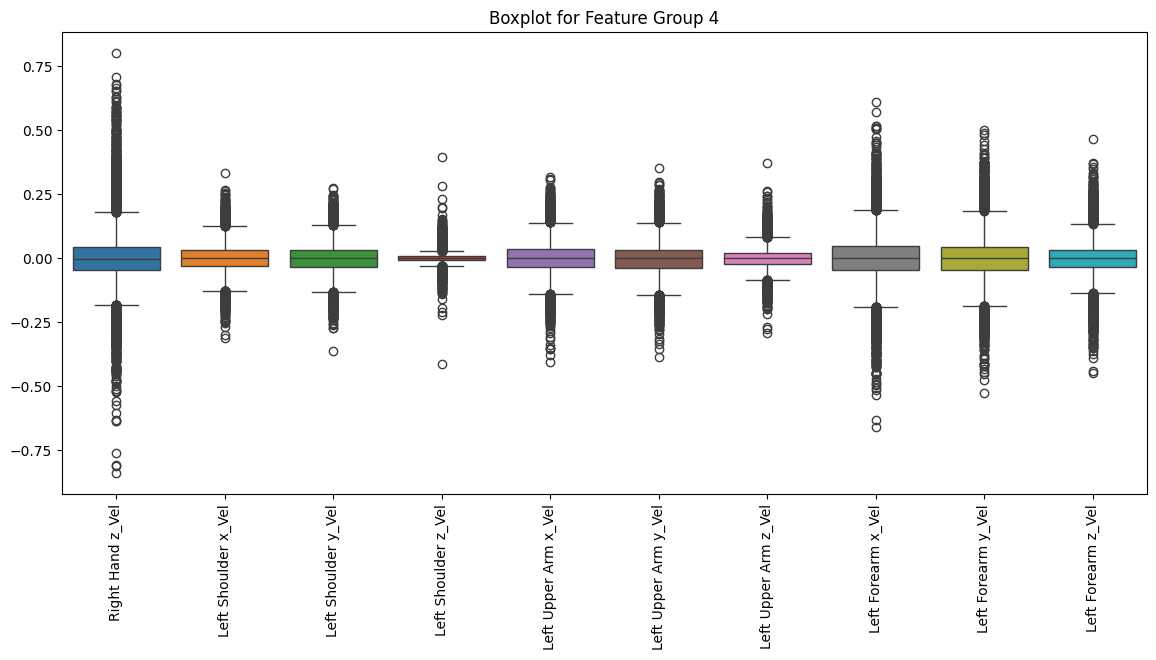

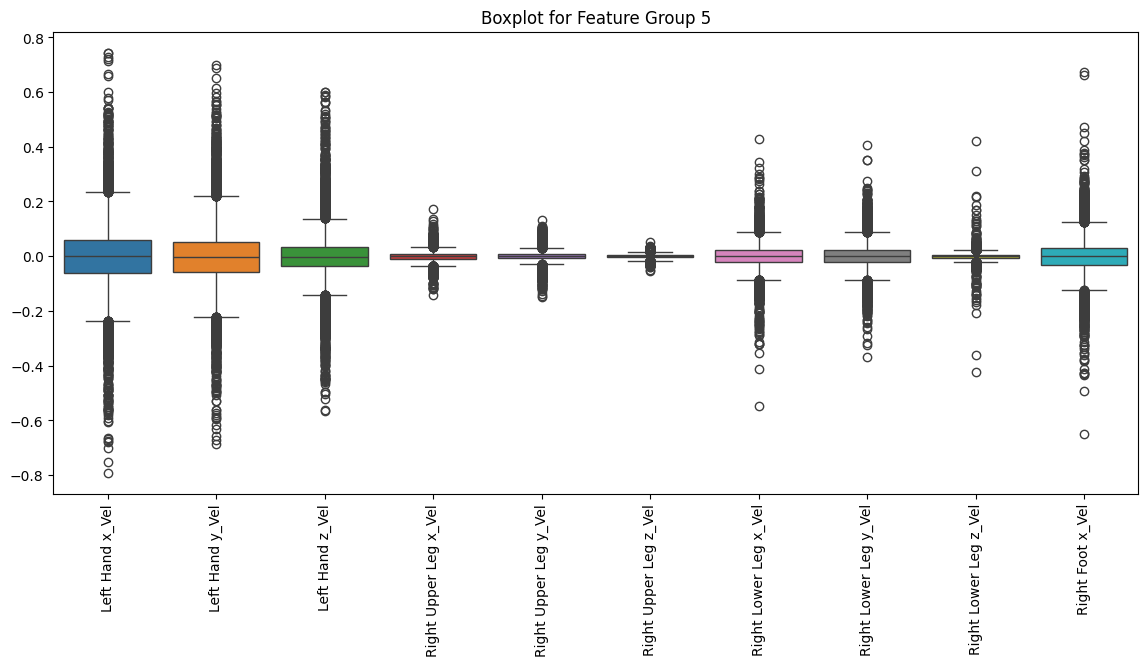

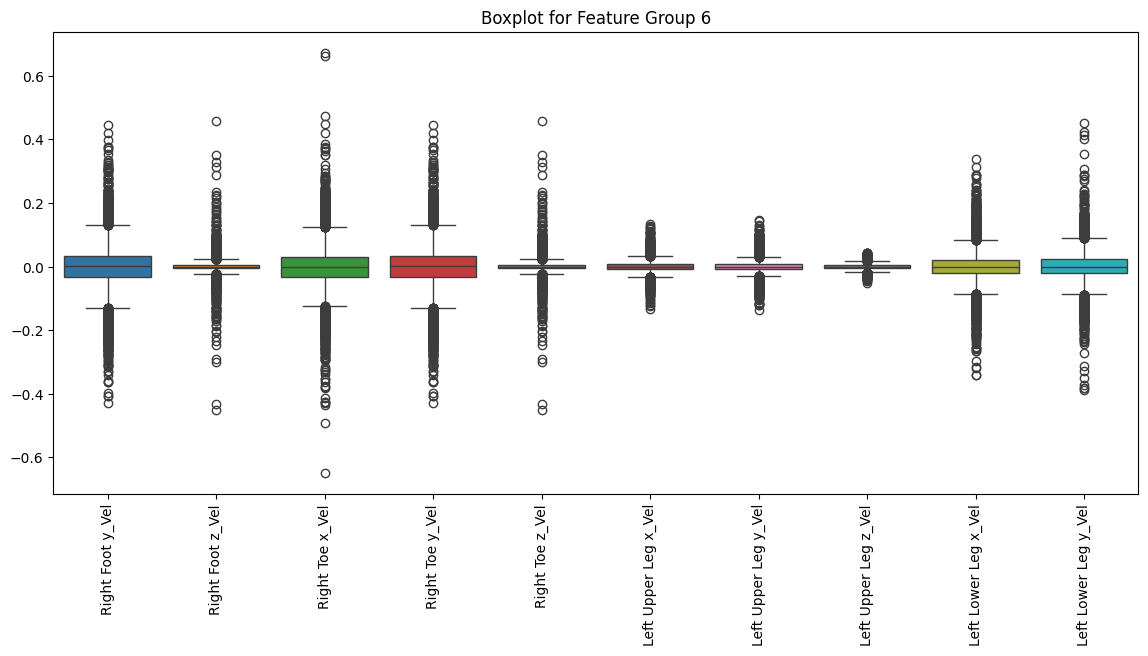

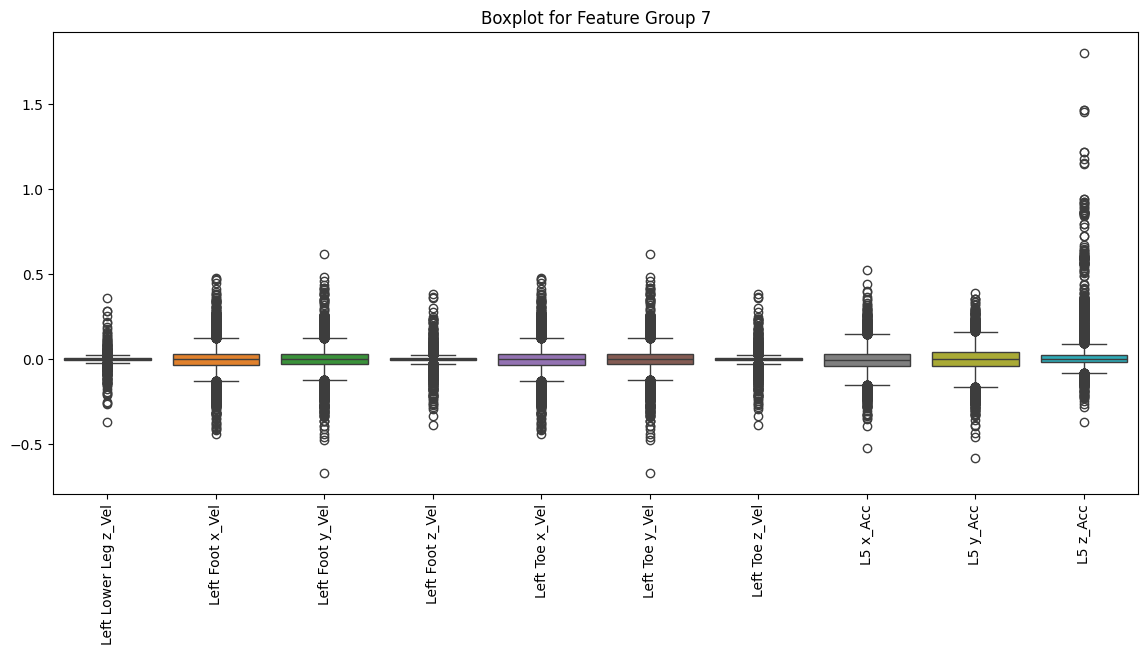

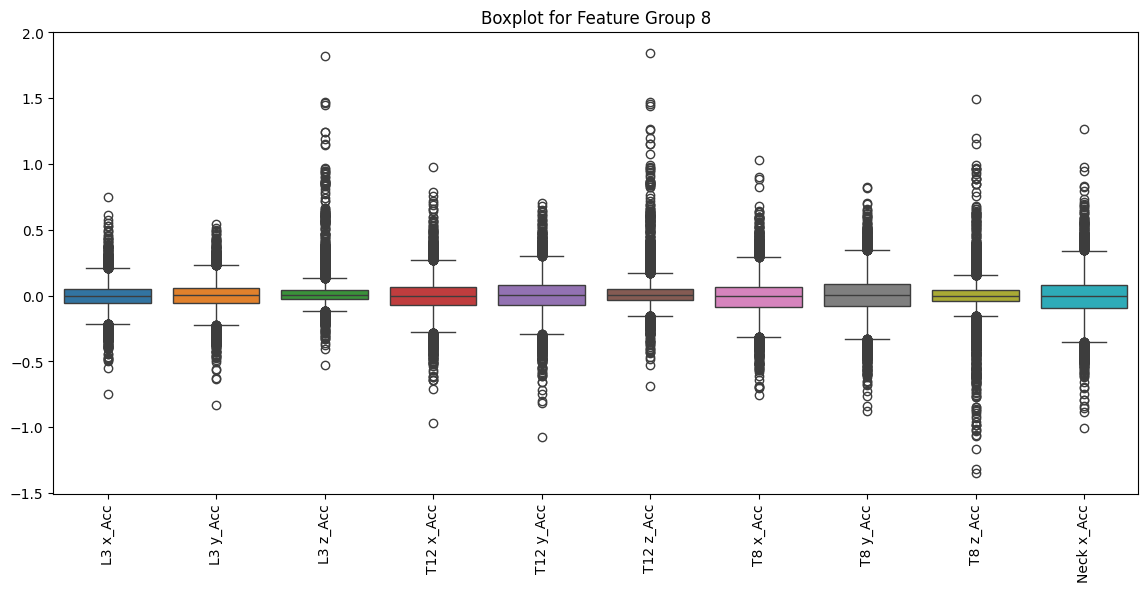

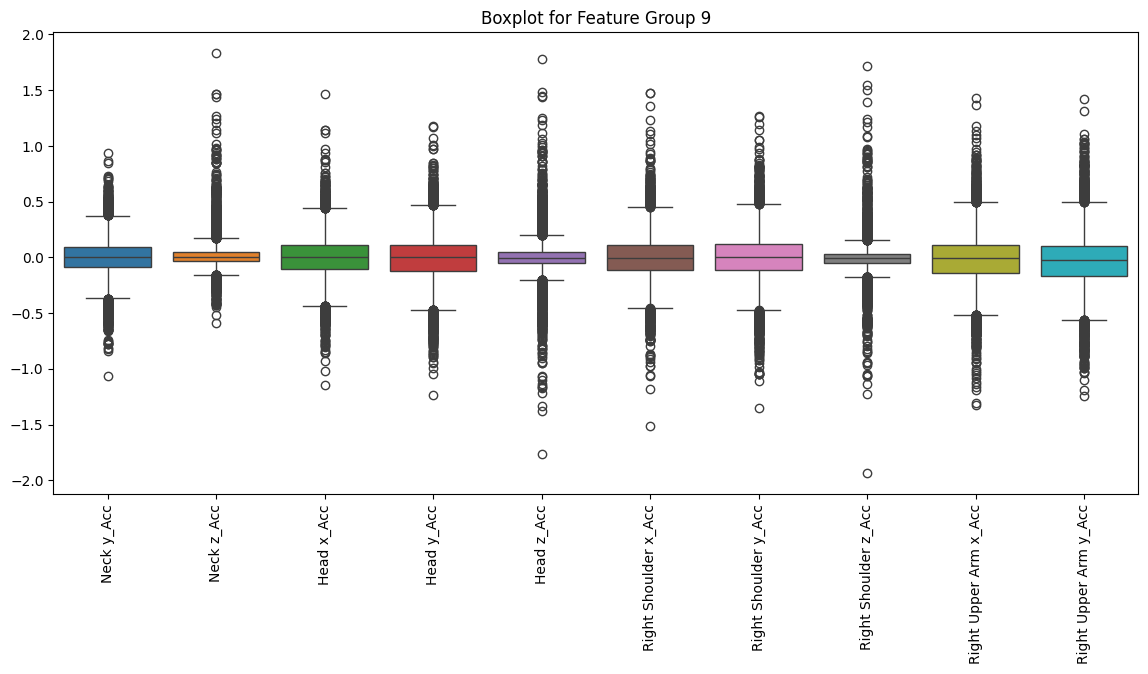

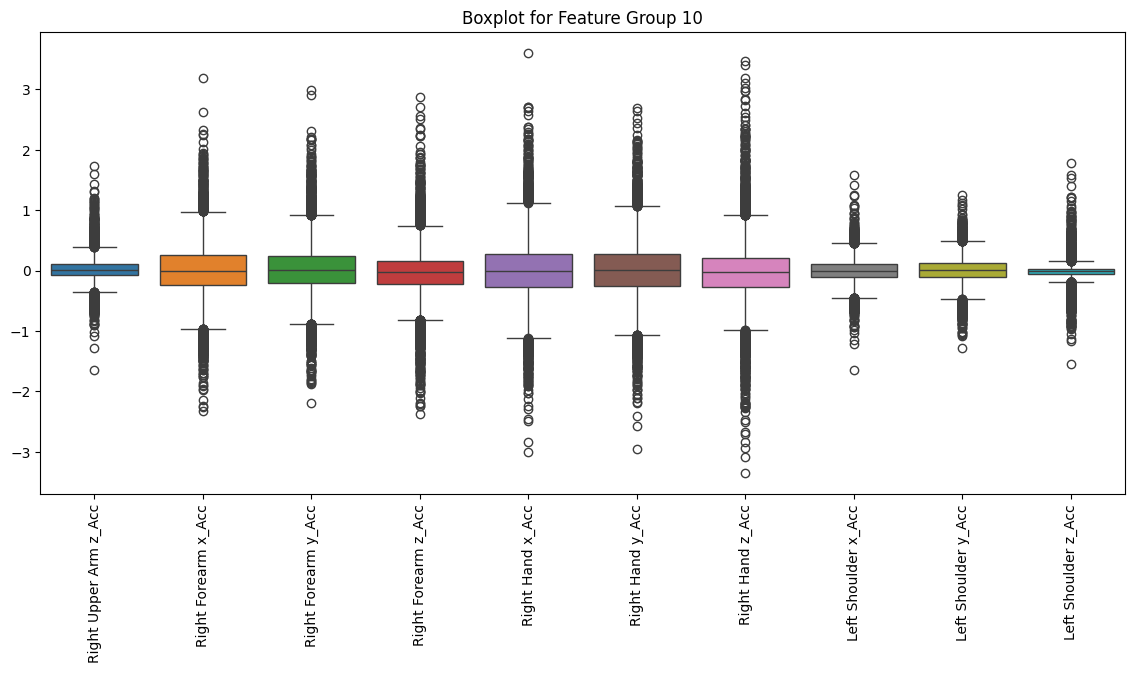

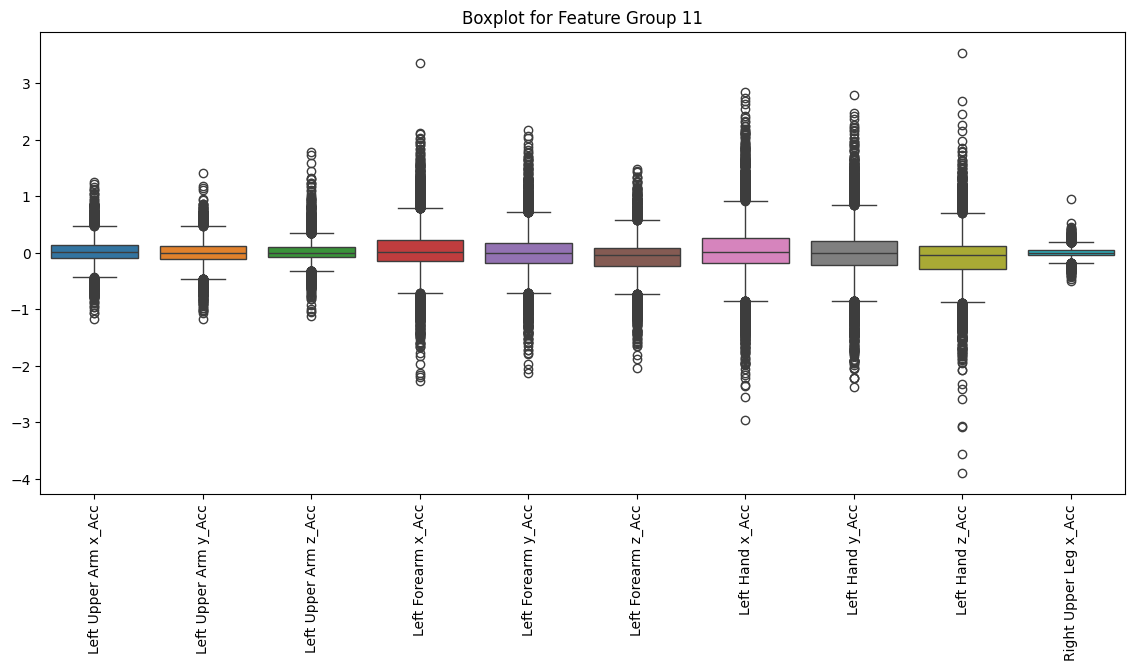

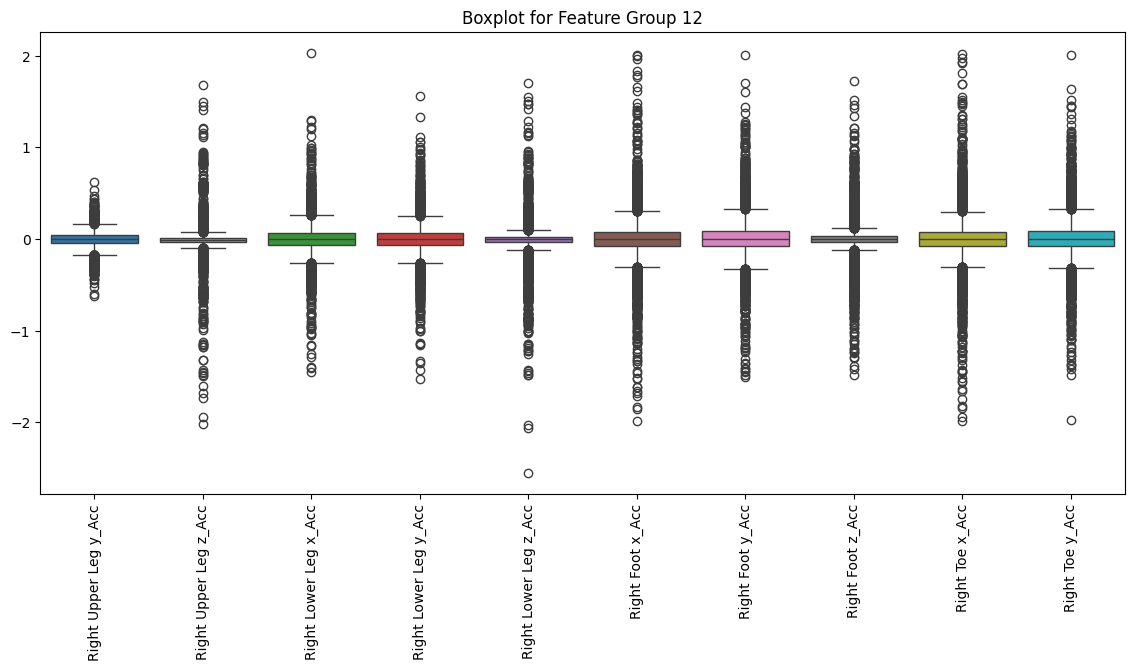

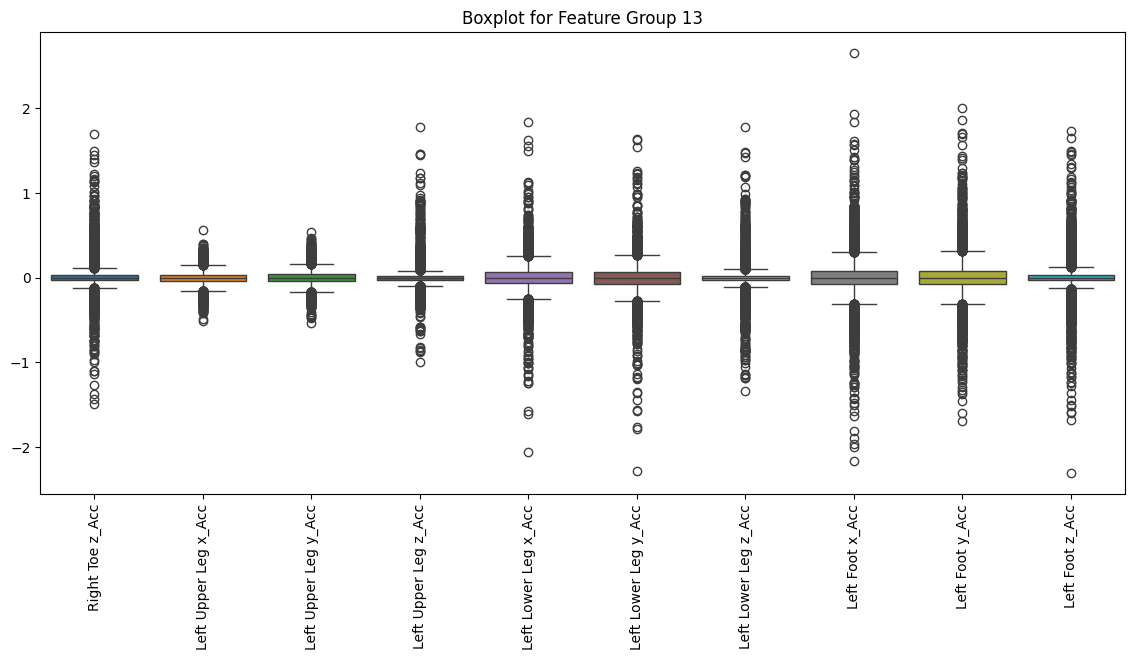

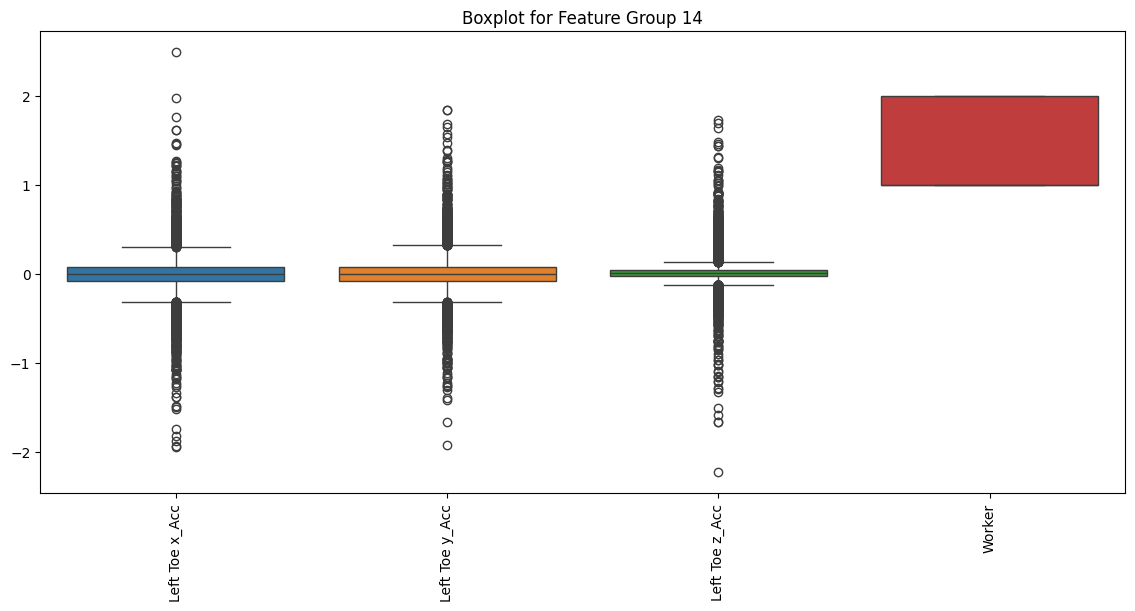

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize outliers using boxplots
def plot_outliers(df, feature_groups):
    for i, group in enumerate(feature_groups):
        plt.figure(figsize=(14, 6))
        sns.boxplot(data=df[group])
        plt.xticks(rotation=90)
        plt.title(f'Boxplot for Feature Group {i+1}')
        plt.show()

# Select numerical columns for visualization
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Divide numerical features into groups of 10 for visualization
feature_groups = [numerical_columns[i:i+10] for i in range(0, len(numerical_columns), 10)]

# Call the function to visualize the outliers for each group
plot_outliers(df, feature_groups)


### Handle outliers

In [1]:
# Capping the outliers using winsorization
from scipy.stats.mstats import winsorize

# Apply the winsorization method to cap the outliers
df[numerical_columns] = df[numerical_columns].apply(lambda x: winsorize(x, limits=[0.05, 0.1]))

# Call the function to visualize the outliers for each group after winsorization
plot_outliers(df, feature_groups)


KeyboardInterrupt: 

## 1.4 - Drop unecessary columns